### 2- (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen coca_multi.png con el mismo témplate del ítem 1

In [ ]:
import numpy as np
import cv2 as cv

#funcion para multiple deteccion
def get_multiple(img, method, rectangle_color=(0, 0, 255), rectangle_thickness=2):
    #assert method in [cv.TM_CCOEFF, cv.TM_CCOEFF_NORMED, cv.TM_CCORR, cv.TM_CCORR_NORMED, cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED], 'Método inválido'

    # Leer el template del logo de Coca-Cola a matchear y pasar la imagen recibida a RGB y a escala de grises.
    template = cv.imread('./template/pattern.png')
    template = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    template = cv.Canny(template,threshold1=50,threshold2=200) # Postprocesamiento parapara detección de bordes con Canny

    scales = np.linspace(0.1, 6, 350)
    scores = []
    best_score = None
    best_result = None
    best_scale = None

    for scale in scales:
        # Reescalar la imagen.
        resize_img_gray = cv.resize(img_gray, None, fx=scale, fy=scale)   # Reescalar la imagen.
          
        if resize_img_gray.shape[0] > template.shape[0] and resize_img_gray.shape[1] > template.shape[1]:  # imagen debe ser mas grande que el template
            # Aplicar Canny a la imagen redimensionada. Usar binarización de Otsu para seleccionar los thresholds.
            threshold2, _ = cv.threshold(resize_img_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
            threshold1 = 0.50 * threshold2
            resize_img_gray = cv.Canny(resize_img_gray, threshold1, threshold2)

            # Buscar el match del template.
            result = cv.matchTemplate(resize_img_gray, template, method)
            
            # Settear los valores máximos y mínimos
            min_val, max_val, _, _ = cv.minMaxLoc(result)
            
            # Si el score supera al actual, guardarlo. Si el método es cv.TM_SQDIFF o TM_SQDIFF_NORMED, se toman los mínimos.
            if (best_score is None or min_val < best_score) and (method == cv.TM_SQDIFF or method == cv.TM_SQDIFF_NORMED):
                best_score = min_val
                best_result = result
                best_scale = scale
            elif best_score is None or max_val > best_score:
                best_score = max_val
                best_result = result
                best_scale = scale

            scores.append(min_val if method == cv.TM_SQDIFF or method == cv.TM_SQDIFF_NORMED else max_val)

    # Tomar como threshold a aquellas coordenadas que están dentro de un desvío estándar de distancia del mejor score hallado.
    scores_std = np.std(scores)
    lower_threshold = best_score - scores_std
    upper_threshold = best_score + scores_std
    loc = np.where((best_result >= lower_threshold) & (best_result <= upper_threshold))

    # Iterar sobre las localizaciones halladas y dibujar los rectángulos.
    for pt in zip(*loc[::-1]):
        x_init, y_init = (int(pt[0] / best_scale), int(pt[1] / best_scale))
        x_final, y_final = (int((pt[0] + template.shape[1]) / best_scale), int((pt[1] + template.shape[0]) / best_scale))
        cv.rectangle(img_rgb,(x_init, y_init),(x_final, y_final),rectangle_color,rectangle_thickness)

    return img_rgb

In [ ]:
from matplotlib import pyplot as plt

img = cv.imread('./images/coca_multi.png')
result_img = get_multiple(img, cv.TM_CCORR_NORMED)

plt.figure(figsize=(12, 8))
plt.imshow(result_img)
#plt.title('Patron detectado')
plt.title('Patron detectado'),plt.xticks([]), plt.yticks([])
#plt.xticks([])
#plt.yticks([])
plt.show()




In [8]:
import numpy as np
import cv2 as cv

#funcion para multiple deteccion
def get_multiple1(img, method, rectangle_color=(0, 0, 255), rectangle_thickness=2):
    #assert method in [cv.TM_CCOEFF, cv.TM_CCOEFF_NORMED, cv.TM_CCORR, cv.TM_CCORR_NORMED, cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED], 'Método inválido'

    # Leer el template del logo de Coca-Cola a matchear y pasar la imagen recibida a RGB y a escala de grises.
    template = cv.imread('./template/pattern.png')
    template = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    template = cv.Canny(template,threshold1=50,threshold2=200) # Postprocesamiento parapara detección de bordes con Canny

    scales = np.linspace(0.1, 6, 350)
    scores = []
    best_score = None
    best_result = None
    best_scale = None

    for scale in scales:
        # Reescalar la imagen.
        resize_img_gray = cv.resize(img_gray, None, fx=scale, fy=scale)   # Reescalar la imagen.
          
        if resize_img_gray.shape[0] > template.shape[0] and resize_img_gray.shape[1] > template.shape[1]:  # imagen debe ser mas grande que el template
            # Aplicar Canny a la imagen redimensionada. Usar binarización de Otsu para seleccionar los thresholds.
            threshold2, _ = cv.threshold(resize_img_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU) # Imagen binarizada (embebida - Otsu) - Parámetros: Imag_original,umbral,valor_máximo,método
            #threshold1 = 0.50 * threshold2
            resize_img_gray = cv.Canny(resize_img_gray, 0.50 * threshold2, threshold2)  # Postprocesamiento con Canny a imagen redimensionada

            # Buscar el match del template.
            result = cv.matchTemplate(resize_img_gray, template, method)
            
            min_val, max_val,min_loc, max_loc = cv.minMaxLoc(result)
            # Si el score supera al actual, guardarlo. Si el método es cv.TM_SQDIFF o TM_SQDIFF_NORMED, se toman los mínimos.
            if (best_score is None or min_val < best_score) and (method == cv.TM_SQDIFF or method == cv.TM_SQDIFF_NORMED):
                best_score = min_val
                best_result = result
                best_scale = scale
            elif best_score is None or max_val > best_score:
                best_score = max_val
                best_result = result
                best_scale = scale

            scores.append(min_val if method == cv.TM_SQDIFF or method == cv.TM_SQDIFF_NORMED else max_val)

    # Tomar como threshold a aquellas coordenadas que están dentro de un desvío estándar de distancia del mejor score hallado.
    scores_std = np.std(scores)
    lower_threshold = best_score - scores_std
    upper_threshold = best_score + scores_std
    loc = np.where((best_result >= lower_threshold) & (best_result <= upper_threshold))

    # Iterar sobre las localizaciones halladas y dibujar los rectángulos.
    for pt in zip(*loc[::-1]):
        x_init, y_init = (int(pt[0] / best_scale), int(pt[1] / best_scale))
        x_final, y_final = (int((pt[0] + template.shape[1]) / best_scale), int((pt[1] + template.shape[0]) / best_scale))
        cv.rectangle(img_rgb,(x_init, y_init),(x_final, y_final),rectangle_color,rectangle_thickness)

    return img_rgb

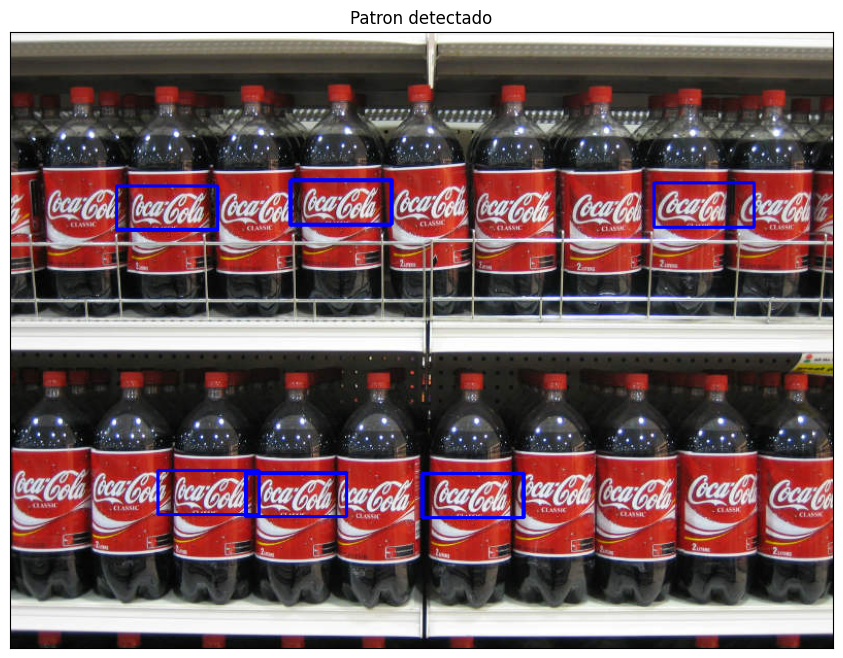

In [9]:
from matplotlib import pyplot as plt

img = cv.imread('./images/coca_multi.png')
result_img = get_multiple1(img, cv.TM_CCORR_NORMED)
plt.figure(figsize=(12, 8))
plt.imshow(result_img)
plt.title('Patron detectado'),plt.xticks([]), plt.yticks([])
plt.show()